In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df=pd.read_csv('/content/agricultural_yield.csv')


In [ ]:
df.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374


In [ ]:
X=df[['Soil_Quality','Seed_Variety','Fertilizer_Amount_kg_per_hectare','Sunny_Days','Rainfall_mm','Irrigation_Schedule']]
y=df['Yield_kg_per_hectare'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
model=Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)),#input layer with 64 neurons, adjusted input shape
    Dense(32,activation='relu'),#hidden layer with 32 neurons
    Dense(1)#output layer for regression(1 neuron)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer= 'adam',
              loss= 'mse',
              metrics= ['mae'])

In [ ]:
history=model.fit(X_train, y_train,epochs=50,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 304919.8125 - mae: 481.2750 - val_loss: 61360.8867 - val_mae: 197.5235
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56990.3359 - mae: 192.4160 - val_loss: 51278.7578 - val_mae: 179.2766
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 47646.2891 - mae: 176.6294 - val_loss: 46373.0859 - val_mae: 171.1914
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45700.5977 - mae: 172.4211 - val_loss: 42474.3086 - val_mae: 163.5727
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42026.3984 - mae: 165.0466 - val_loss: 39363.1836 - val_mae: 157.0540
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40738.9688 - mae: 165.1564 - val_loss: 36996.3672 - val_mae: 153.0899
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37565.1445 - mae: 158.4631 - val_loss: 36110.7070 - val_mae: 152.9860
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35413.8320 - mae: 152.8839 - val_loss: 32478.

In [ ]:
test_loss,test_mae=model.evaluate(X_test,y_test,verbose=1)
print(f"Test Mean Absolute error: {test_mae:.2f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3295.9915 - mae: 46.0856 
Test Mean Absolute error: 44.01


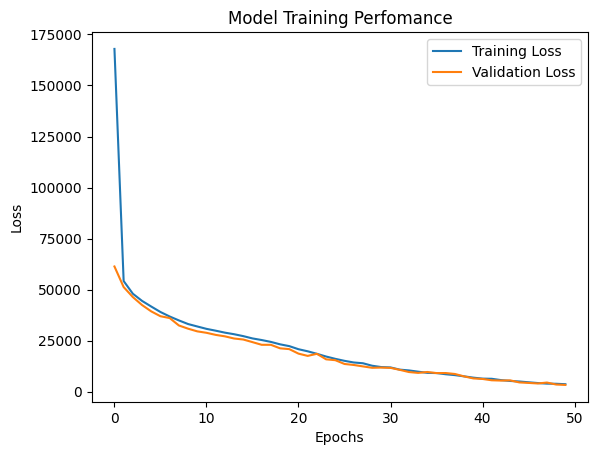

In [ ]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Perfomance ')
plt.legend()
plt.show()

In [ ]:
y_pred=model.predict(X_test)
y_pred

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[ 486.0831 ],
       [ 639.1449 ],
       [1087.298  ],
       [ 650.90234],
       [ 796.5033 ],
       [ 999.3835 ],
       [ 343.89783],
       [ 641.501  ],
       [ 492.99124],
       [ 802.25085],
       [ 577.15826],
       [ 671.95483],
       [ 614.91675],
       [ 734.8738 ],
       [ 850.52905],
       [ 670.14087],
       [ 961.45386],
       [ 510.88174],
       [ 630.7141 ],
       [ 399.29306],
       [ 798.0916 ],
       [ 792.9919 ],
       [ 398.69772],
       [ 809.50024],
       [1016.3939 ],
       [ 646.6222 ],
       [ 655.4945 ],
       [ 974.95935],
       [ 695.18335],
       [ 621.85254],
       [ 679.79443],
       [ 806.3436 ],
       [ 826.6124 ],
       [ 858.4501 ],
       [ 511.2504 ],
       [ 705.4755 ],
       [ 711.4646 ],
       [1017.8124 ],
       [ 213.3932 ],
       [ 645.6751 ],
       [ 929.4372 ],
       [ 890.318  ],
       [ 786.2866 ],
       [ 828.3152 ],
       [ 576.45764],
       [ 830.98914],
       [ 672.56836],
       [ 540.

<ipython-input-30-6d5a5f2fa332>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual Yield')
<ipython-input-30-6d5a5f2fa332>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Predicted Yield')


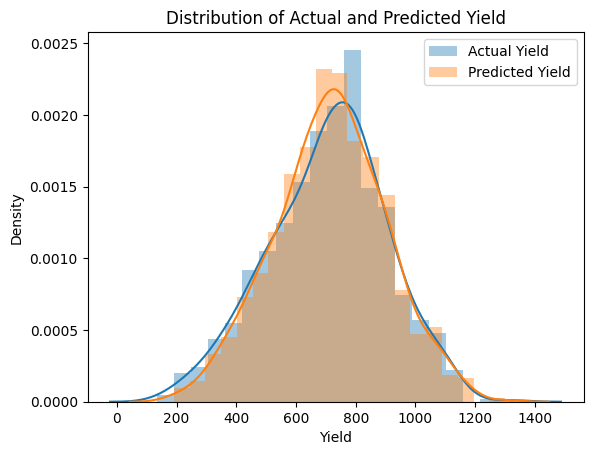

In [ ]:
import seaborn as sns
sns.distplot(y_test, label='Actual Yield')
sns.distplot(y_pred, label='Predicted Yield')
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()

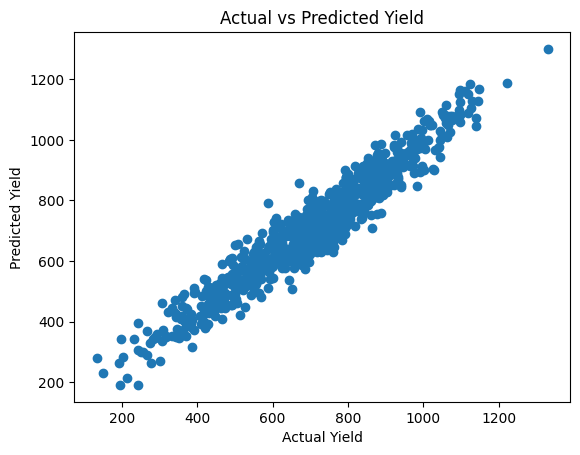

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield')
plt.show()

In [ ]:
#list of hyperparameters
'''
no of layers
no of neurons
activation function
no. of input feature
optimizer
epochs
batch_size
learning rate
dropout
Dataset/Data Sample
'''


'\nno of layers\nno of neurons\nactivation function\nno. of input feature\noptimizer\nepochs\nbatch_size\nlearning rate\ndropout\nDataset/Data Sample\n'